# Lecture 4 notebook (Recurrent Neural Networks Example 2: MNIST)
## Introduction to TensorFlow and Deep Learning

## IADS Summer School 2023

### Dr Michael Fairbank, University of Essex, UK

- Email: m.fairbank@essex.ac.uk
- This is a Jupyter Notebook to accompany Lecture 4 of the course



## Build a time-sequence test problem

- We will treat each 28*28 image of the MNIST digits as a time sequence!
- We will ask a RNN to look at one row at a time of each image (i.e. a time sequence of rows)
- The task for the RNN is simply to classify each digit
- Acknowledgement: The idea for this demo came from https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/recurrent_network.py


In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np

mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
# MNIST images are 28*28.  
# Also rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images=test_images.astype('float32')/255.0 # 10000 test patterns, shape 10000*28*28
train_images=train_images.astype('float32')/255.0 # 60000 train patterns, shape 60000*28*28

'''
To classify images using a recurrent neural network, we consider every image
row as a sequence of pixels. Because MNIST image shape is 28*28px, we will then
handle 28 sequences of 28 steps for every sample.
'''

num_classification_categories=train_labels.max()+1
layer0=tf.keras.layers.Reshape((28,28))
#layer1=tf.keras.layers.SimpleRNN(n_hidden, return_sequences=False) 
layer1=tf.keras.layers.LSTM(128, return_sequences=False) # receives input shape (batch_size, sequence_length, 28), and produces output shape (batch_size, 128)
layer2=tf.keras.layers.Dense(10, activation='relu') # A fully connected layer with 10 outputs
layer3=tf.keras.layers.Dense(num_classification_categories, activation=None) # final layer with 10 outputs (i.e. 10 probabilities)
model = tf.keras.Sequential([layer0, layer1,layer2,layer3])

model(train_images[0:10],True) # we have to run the network once before the trainable_variables are created
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (10, 28, 28)              0         
                                                                 
 lstm (LSTM)                 (10, 128)                 80384     
                                                                 
 dense (Dense)               (10, 10)                  1290      
                                                                 
 dense_1 (Dense)             (10, 10)                  110       
                                                                 
Total params: 81,784
Trainable params: 81,784
Non-trainable params: 0
_________________________________________________________________
None


In [2]:
optimizer=keras.optimizers.Adam()

model.compile(optimizer=optimizer,  
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                batch_size=128,
                epochs=5,
                validation_data=(test_images, test_labels))

Epoch 1/5
469/469 [==============================] - 62s 127ms/step - loss: 0.6934 - accuracy: 0.7837 - val_loss: 0.2441 - val_accuracy: 0.9245
Epoch 2/5
469/469 [==============================] - 56s 119ms/step - loss: 0.1779 - accuracy: 0.9498 - val_loss: 0.1214 - val_accuracy: 0.9645
Epoch 3/5
469/469 [==============================] - 55s 118ms/step - loss: 0.1157 - accuracy: 0.9668 - val_loss: 0.1109 - val_accuracy: 0.9680
Epoch 4/5
469/469 [==============================] - 55s 117ms/step - loss: 0.0928 - accuracy: 0.9727 - val_loss: 0.0864 - val_accuracy: 0.9748
Epoch 5/5
469/469 [==============================] - 55s 118ms/step - loss: 0.0719 - accuracy: 0.9789 - val_loss: 0.0694 - val_accuracy: 0.9794


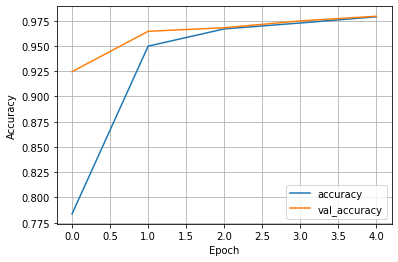

In [3]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()